In [1]:
%pylab inline
import scipy
from scipy.spatial.distance import squareform, pdist

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show(close=None, block=None)>

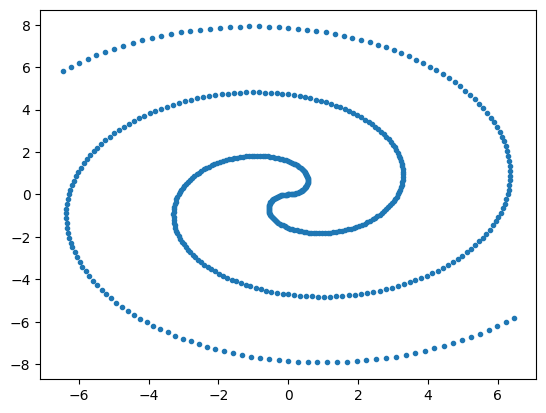

In [2]:
# Read datas

unarr_datas = []
with open('datas/spiral2.txt', 'r') as in_file:
    raw_datas = in_file.readlines()
    for line in raw_datas:
        points = list(map(float, line.split()))
        unarr_datas.append(np.array([points[1], points[2]]))

datas = np.array(unarr_datas)
N = len(datas)

plt.scatter(datas[:, 0], datas[:, 1], marker='.')
plt.show

In [3]:
# Compute K, P, D matrices

def get_K0(data):
    Dis=squareform(pdist(data))
    Dis_sort = sort(Dis,1)    # distance of one point to another arrange in descending power
    Dis=Dis*Dis
    
    Sigma=diag(1/Dis_sort[:,s+1])
    
    K=Sigma.dot(Dis).dot(Sigma)
    K=exp(-K)
    return K
    
def get_K(data, sigma):
    Dis = squareform(pdist(data))
    Dis = Dis * Dis

    Sigma = np.eye(N) / (sigma**2)

    K = Sigma.dot(Dis)
    K = exp(-K)
    return K

def get_P(K, t):
    D = diag(1 / sum(K, axis=1))
    P = D.dot(K)
    return np.linalg.matrix_power(P, t)

def get_DnQ(K):
    D=diag(1/sqrt(sum(K, axis=1)))
    Q=D.dot(K).dot(D)
    return D, Q

def get_D(P):
    Dis = squareform(pdist(P))
    return Dis * Dis

In [4]:
K = get_K(datas, 2)
D, Q= get_DnQ(K)
P = get_P(K, 1)

# Q is symmetric
print(sum(transpose(Q) - Q))

-3.389636702121535e-32


In [5]:
qval, qvec = scipy.linalg.eig(Q)
pval, pvec = scipy.linalg.eig(P)

# Q and P has same eiganvalues
print(qval - pval)

[ 6.66133815e-16+0.00000000e+00j  1.11022302e-16+0.00000000e+00j
 -2.99760217e-15+0.00000000e+00j  5.66213743e-15+0.00000000e+00j
 -2.22044605e-16+0.00000000e+00j  1.44328993e-15+0.00000000e+00j
  2.99760217e-15+0.00000000e+00j -1.33226763e-15+0.00000000e+00j
  1.44328993e-15+0.00000000e+00j  2.66453526e-15+0.00000000e+00j
 -8.88178420e-16+0.00000000e+00j  7.77156117e-16+0.00000000e+00j
 -1.22124533e-15+0.00000000e+00j  2.33146835e-15+0.00000000e+00j
  1.11022302e-16+0.00000000e+00j  2.22044605e-15+0.00000000e+00j
  4.32986980e-15+0.00000000e+00j  1.99840144e-15+0.00000000e+00j
  1.49880108e-15+0.00000000e+00j  3.33066907e-16+0.00000000e+00j
  7.77156117e-16+0.00000000e+00j -1.05471187e-15+0.00000000e+00j
 -5.55111512e-17+0.00000000e+00j  4.99600361e-16+0.00000000e+00j
 -9.43689571e-16+0.00000000e+00j  6.10622664e-16+0.00000000e+00j
 -1.11022302e-15+0.00000000e+00j -8.32667268e-17+0.00000000e+00j
  2.13717932e-15+0.00000000e+00j  8.04911693e-16+0.00000000e+00j
  4.44089210e-16+0.000000

In [6]:
U, S, V = qvec, diag(qval), transpose(qvec)

# eigen-decomposition
print(U.dot(S).dot(V) - Q)

[[-3.98986399e-17-9.02779661e-36j  1.21430643e-17-2.68953107e-35j
   1.73472348e-18+1.35416949e-35j ...  4.72929453e-17-1.11084216e-35j
   4.24944874e-17+1.59793763e-36j  3.64252627e-17-3.90903529e-38j]
 [ 1.21430643e-17+4.38224294e-35j  7.97972799e-17-4.22472670e-35j
   7.45931095e-17+7.87581215e-35j ...  4.27954406e-17+3.72337836e-36j
   2.81398078e-17-2.74037121e-37j  3.32507093e-17+5.00847837e-38j]
 [ 0.00000000e+00-4.51389831e-36j  7.45931095e-17+6.48872882e-35j
   7.97972799e-17+6.85548305e-35j ...  1.76301602e-17-1.30773747e-37j
   1.25106447e-17+7.20724974e-37j  1.25976222e-17+1.61607514e-37j]
 ...
 [ 4.70574851e-17+3.11212129e-36j  4.26484071e-17-2.84175759e-36j
   1.76865858e-17+1.12098080e-35j ...  2.49800181e-16+1.18284119e-37j
   2.35922393e-16+1.03774111e-37j  1.24900090e-16-1.03085344e-38j]
 [ 4.19298602e-17-9.71435878e-37j  2.78254897e-17-2.25180637e-37j
   1.22007424e-17+2.20368457e-36j ...  2.35922393e-16-8.20090981e-38j
   1.80411242e-16-6.03818387e-39j  2.08166817e-

In [7]:
# eig_Q is the eigenvectors for P computed from eigenvectors of Q
eig_Q = D.dot(U)
eig_Q_inv = V.dot(diag(sqrt(sum(K, axis=1))))

tmp = eig_Q.dot(S).dot(eig_Q_inv)
print(tmp - P)

[[-4.33680869e-17+2.10648588e-35j  1.73472348e-17+2.03125424e-35j
  -8.67361738e-18+2.82118644e-35j ...  1.44881426e-17+8.27254149e-37j
   1.22705686e-17+3.64862426e-37j  9.91978600e-18-2.21380943e-38j]
 [ 1.38777878e-17+8.46355933e-36j  7.45931095e-17+3.84856850e-35j
   6.93889390e-17-7.01064831e-35j ...  1.28404109e-17-5.75624890e-37j
   7.91744817e-18+1.36375712e-38j  8.73197505e-18+1.21739430e-38j]
 [-1.21430643e-17-1.12847458e-35j  7.45931095e-17+8.86322741e-35j
   7.97972799e-17-1.62688418e-35j ...  5.16988632e-18+4.92238259e-37j
   3.45074697e-18+4.93156614e-38j  3.33325913e-18+4.70025549e-38j]
 ...
 [ 1.52365119e-16-2.05241314e-35j  1.40513782e-16+1.28510920e-35j
   5.73906292e-17+1.32360664e-35j ...  2.08166817e-16+7.01990533e-37j
   1.80411242e-16-4.04076183e-38j  2.63677968e-16-1.15425739e-38j]
 [ 1.44030635e-16+6.66578765e-36j  9.62637811e-17+1.10202595e-38j
   4.11804876e-17-9.94909031e-36j ...  1.66533454e-16-1.22141210e-38j
   1.38777878e-16-1.14564781e-38j  1.24900090e-

In [8]:
# Color with Diffusion Distance with array

def get_d(P, index):
    D = np.zeros(N)
    for j in range(N):
        D[j] = sum( (P[index] - P[j]) ** 2)
    return np.array(D)


def show_diffusion_distance(d, index):
    center_point = np.array(datas[index])
    distances = d
    
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(0, d.max())
    colors = cmap(norm(distances))
    
    fig, ax = plt.subplots()
    
    scatter = ax.scatter(datas[:, 0], datas[:, 1], color=colors, s=25)
    
    ax.scatter(center_point[0], center_point[1], color='red', s=100, label='Center')
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Distance from Center')
    
    ax.set_title('Points Colored by Diffusion Distance')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    
    plt.show()

K done
P done
d done


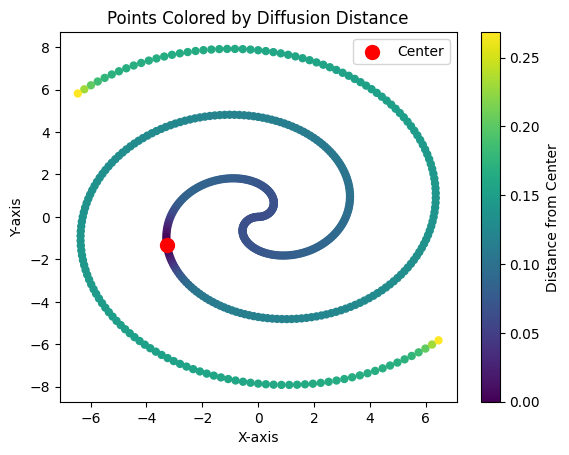

K done
P done
d done


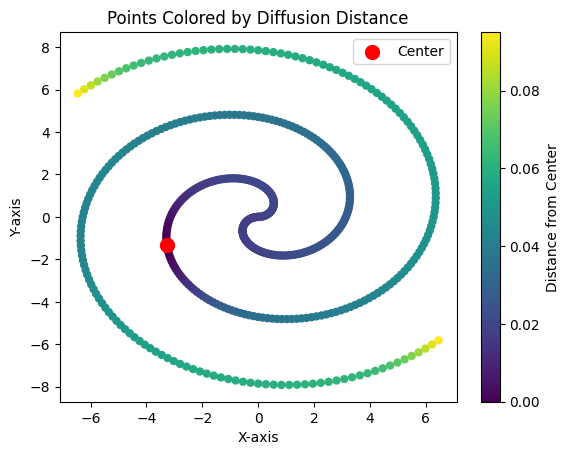

K done
P done
d done


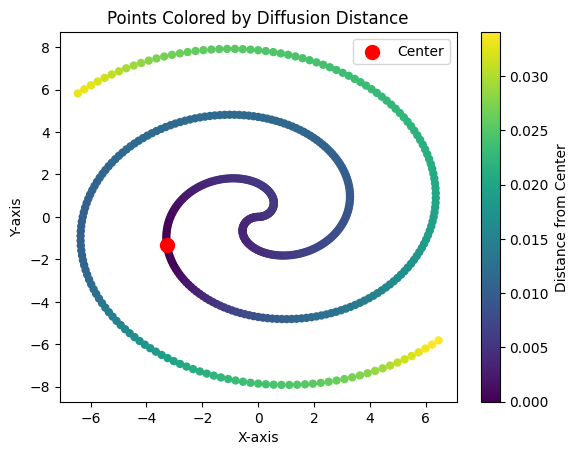

K done
P done
d done


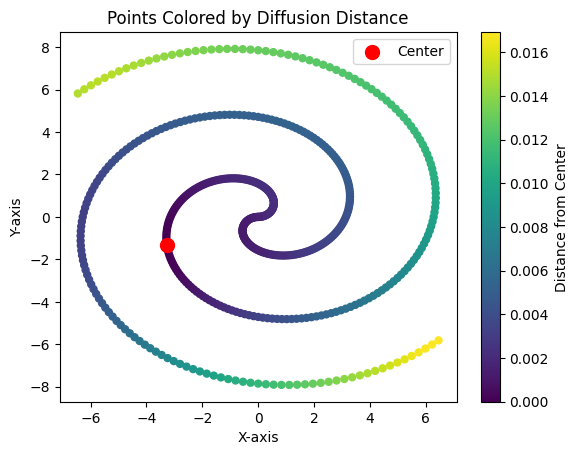

K done
P done
d done


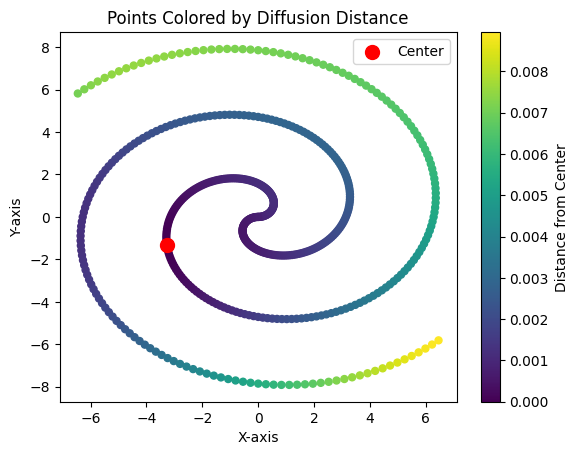

K done
P done
d done


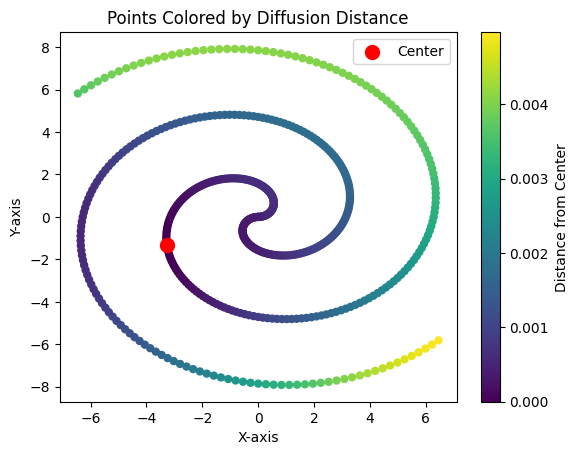

K done
P done
d done


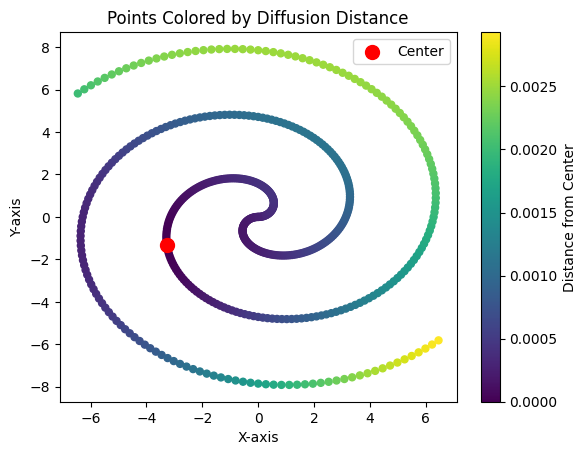

K done
P done
d done


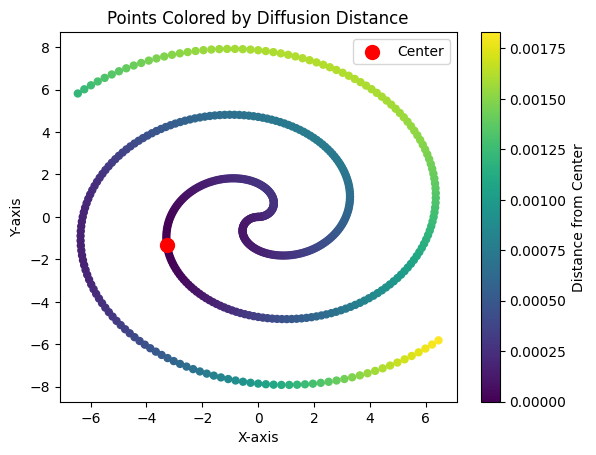

K done
P done
d done


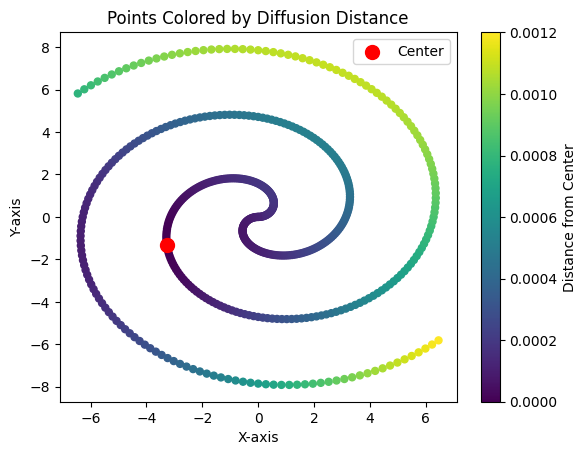

K done
P done
d done


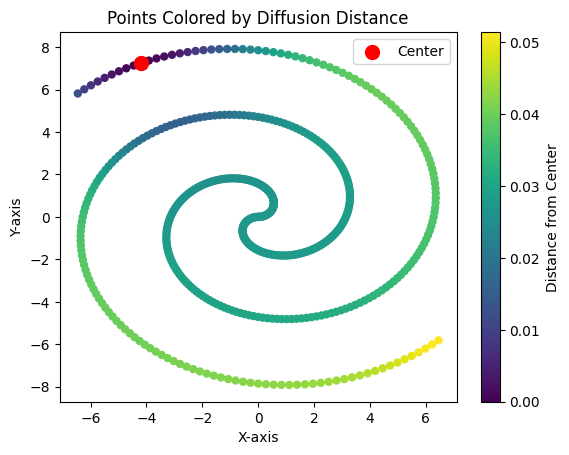

In [9]:
def test(index, sigma, t):
    K = get_K(datas, sigma)
    print('K done')
    P = get_P(K, t)
    print('P done')
    d = get_d(P, index)
    print('d done')
    show_diffusion_distance(d, index)

def test0(index, t):
    K = get_K0(datas)
    print('K0 done')
    P = get_P(K, t)
    print('P done')
    d = get_d(P, index)
    print('d done')
    show_diffusion_distance(d, index)

INDEX, SIGMA = 101, [1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in SIGMA:
    test(INDEX, s, 1)

# INDEX, T = 101, [1, 2, 5, 10, 25, 100]
# for t in T:
#     test0(INDEX, t)
test(240, 3, 1)

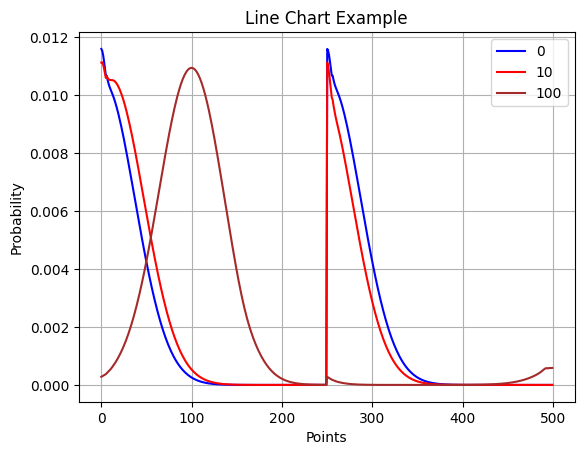

In [10]:
# show the row of the P matrix of two points

P = get_P(get_K0(datas), 100)

indeces = [i for i in range(1)]
indeces = [0, 10, 100]
y = [P[index] for index in indeces]
x = np.array([i for i in range(N)])
COLOR = ['blue', 'red', 'brown', 'black', 'green']

for i in range(len(indeces)):
    plt.plot(x, y[i], '-',color=COLOR[i%5], label=f'{indeces[i]}')

plt.title('Line Chart Example')
plt.xlabel('Points')
plt.ylabel('Probability')

plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Diffusion Distance Clustering

def clustering(datas, n, steps):
    # centroids_index = random_centroids_index(datas, n)
    centroids_index = [1, 240]
    print(centroids_index)
    for _ in range(1):
        clusters = [[] for _ in range(len(centroids_index))]
        
        for i in range(N):
            distance = []
            for j in centroids_index:
                distance.append(D[i][j])
            # print(i, distance)
            index = np.argmin(distance)
            clusters[index].append(i)
            
        centroids_index.clear()
        
        
    return clusters

K = get_K(datas, 2)
print('K done')
P = get_P(K, 1)
print('P done')
D = get_D(P)
print('D done')

K done
P done
D done


[1, 240]


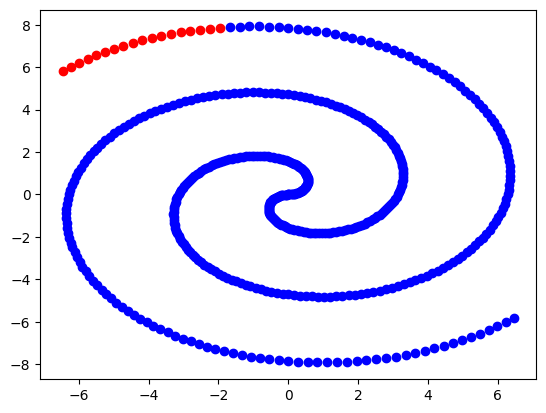

In [12]:
clusters = clustering(datas, 2, 10)
COLOR = ['blue', 'red', 'brown']
for i in range(len(clusters)):
    for index in clusters[i]:
        data = datas[index]
        plt.plot(data[0], data[1], 'o', color=COLOR[i])
        # plt.annotate(index, (data[0], data[1]), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()